In [1]:
#Retriving the images from the folders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import glob
import numpy as np
data=[]
y=[]
def path_reading(path,k):
  for file in glob.glob(path):
    image_read = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    images=cv2.resize(image_read,(100,100))
    data.append(images)
    y.append(k)
img_path="/content/drive/MyDrive/Car-Bike-Dataset/Bike/*.*"
path_reading(img_path,1)

img_path="/content/drive/MyDrive/Car-Bike-Dataset/Car/*.*"
path_reading(img_path,0)
'''
#img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Severe/*.*"
#path_reading(img_path,1)

img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Moderate/*.*"
path_reading(img_path,1)'''

data=np.array(data)
y=np.array(y)

print(data,y)

[[[128 228 232 ... 104 100 109]
  [213 234 228 ... 119 105  85]
  [201 229 230 ... 133 111 110]
  ...
  [167 168 169 ... 125 126 127]
  [168 169 170 ... 126 128 130]
  [163 165 165 ... 127 130 127]]

 [[114  82 119 ...  90  85  97]
  [129  89 121 ...  98 101  87]
  [132 121 126 ...  88  96  93]
  ...
  [158 163 167 ... 180 182 179]
  [164 163 155 ... 177 178 177]
  [165 172 165 ... 172 173 176]]

 [[ 90  91  93 ... 121 122 123]
  [ 93  94  96 ... 117 121 124]
  [ 96  97  99 ... 114 120 123]
  ...
  [ 88  59  65 ...  54  48  81]
  [ 33  54  68 ...  80 100 128]
  [ 57  51  61 ...  79  83  97]]

 ...

 [[246 196  50 ... 128 133 137]
  [208  33   0 ... 134 136 138]
  [ 69   0   0 ... 136 135 135]
  ...
  [ 79  78  77 ...  39  39  39]
  [ 78  77  76 ...  39  39  39]
  [ 78  77  75 ...  38  38  38]]

 [[214 215 216 ... 211 217 219]
  [216 217 217 ... 206 207 208]
  [215 216 217 ... 209 207 208]
  ...
  [157 155 153 ... 152 157 158]
  [152 154 155 ... 162 155 156]
  [144 151 157 ... 162 160 1

In [4]:
print(data.shape)
print(y.shape)

(4000, 100, 100)
(4000,)


In [5]:
#Reshaping the sample size

In [6]:
nsamples, nx, ny = data.shape
x = data.reshape((nsamples,nx*ny))
print(x.shape)

(4000, 10000)


In [7]:
from sklearn.utils import shuffle
x,y=shuffle(x,y)

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.25, random_state = 0)

In [9]:
#normalizing(to transform features to be o a similar scale) the data-standardscaler
# standardscaler it helps converting all numerical values into the one range
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)

**Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [11]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [12]:
y_pred = model.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[382  97]
 [172 349]]
Accuracy :  0.731


In [14]:
#confusion matrix
#to know the method i.e, underfitting or overfitting or it evaluates the performance of the model

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       479
           1       0.78      0.67      0.72       521

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.73      0.73      1000



**KNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Accuracy : ", accuracy_score(ytest,pred))
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

Accuracy :  0.724
[[377 102]
 [174 347]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       479
           1       0.77      0.67      0.72       521

    accuracy                           0.72      1000
   macro avg       0.73      0.73      0.72      1000
weighted avg       0.73      0.72      0.72      1000



**Desicion Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.5, 0.9, 'x[8148] <= -0.893\ngini = 0.5\nsamples = 3000\nvalue = [1521, 1479]'),
 Text(0.25, 0.7, 'x[8154] <= -0.883\ngini = 0.36\nsamples = 730\nvalue = [558, 172]'),
 Text(0.125, 0.5, 'x[4437] <= -1.185\ngini = 0.258\nsamples = 467\nvalue = [396, 71]'),
 Text(0.0625, 0.3, 'x[8065] <= -1.15\ngini = 0.486\nsamples = 72\nvalue = [42, 30]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.09375, 0.1, 'gini = 0.454\nsamples = 46\nvalue = [16, 30]'),
 Text(0.1875, 0.3, 'x[4668] <= -1.479\ngini = 0.186\nsamples = 395\nvalue = [354, 41]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.21875, 0.1, 'gini = 0.164\nsamples = 389\nvalue = [354, 35]'),
 Text(0.375, 0.5, 'x[4741] <= -0.725\ngini = 0.473\nsamples = 263\nvalue = [162, 101]'),
 Text(0.3125, 0.3, 'x[7464] <= -0.63\ngini = 0.414\nsamples = 65\nvalue = [19, 46]'),
 Text(0.28125, 0.1, 'gini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.34375, 0.1, 'gini = 0.108\nsamples = 35\

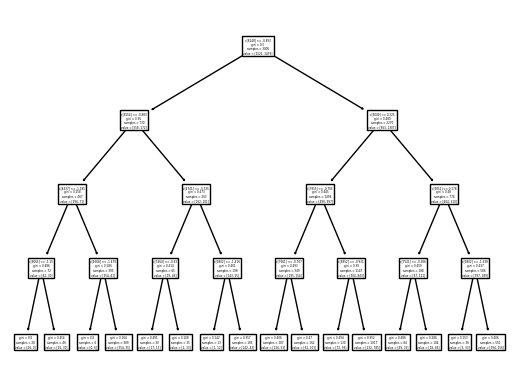

In [19]:
from sklearn import tree
tree.plot_tree(clf_tree)

In [20]:
pre=clf_tree.predict(xtest)

In [21]:
pre

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
print ("Accuracy : ", accuracy_score(ytest,pre))
print(confusion_matrix(ytest, pre))
print(classification_report(ytest, pre))

Accuracy :  0.713
[[360 119]
 [168 353]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       479
           1       0.75      0.68      0.71       521

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.72      0.71      0.71      1000



**Support Vector Machine**

In [23]:
from sklearn.svm import SVC
cl = SVC(kernel='linear', probability=True, random_state=42)
cl.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True, random_state=42)

In [24]:
p=cl.predict(xtest)

In [25]:
print ("Accuracy : ", accuracy_score(ytest,p))
print(confusion_matrix(ytest, p))
print(classification_report(ytest, p))

Accuracy :  0.697
[[370 109]
 [194 327]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       479
           1       0.75      0.63      0.68       521

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



**Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(xtrain, ytrain)

RandomForestClassifier()

In [27]:
dn=regressor.predict(xtest)

In [28]:
dn

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [29]:
print ("Accuracy : ", accuracy_score(ytest,dn))
print(confusion_matrix(ytest, dn))
print(classification_report(ytest, dn))

Accuracy :  0.823
[[421  58]
 [119 402]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       479
           1       0.87      0.77      0.82       521

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000



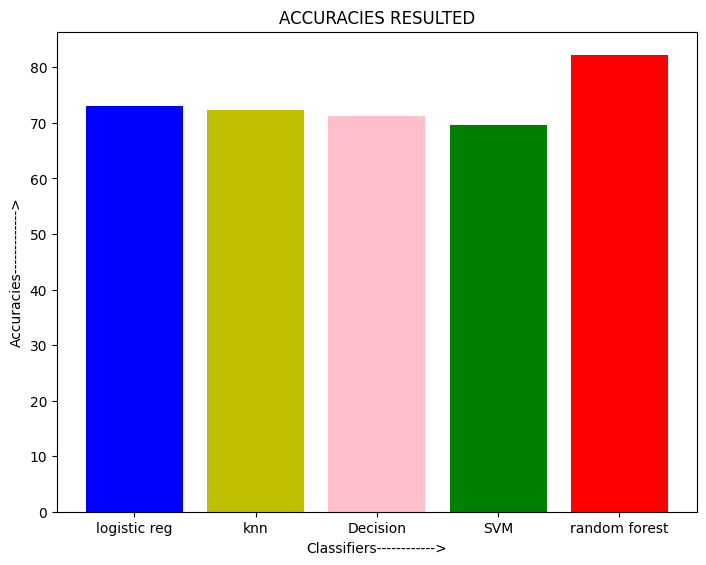

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','knn','Decision','SVM','random forest']

accuracy = [accuracy_score(ytest, y_pred)*100,accuracy_score(ytest,pred)*100,accuracy_score(ytest,pre)*100,accuracy_score(ytest,p)*100,accuracy_score(ytest,dn)*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')


ax.bar(algo[3],accuracy[3],color = 'green')

ax.bar(algo[4],accuracy[4],color = 'r')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()